speech emotion recognition system
The objective of this project is to develop a robust speech emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more.

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:

# Specify the path to the root directory of your dataset
dataset_root = '/content/drive/MyDrive/Data/AudioData'

# Initialize lists to store audio file paths and their corresponding emotion labels
audio_paths = []
emotion_labels = []

# Iterate through subdirectories (one for each speaker)
for speaker_dir in os.listdir(dataset_root):
    speaker_path = os.path.join(dataset_root, speaker_dir)

    # Check if the item in the dataset_root is a directory
    if os.path.isdir(speaker_path):
        # Iterate through audio files in the speaker's directory
        for audio_file in os.listdir(speaker_path):
            audio_path = os.path.join(speaker_path, audio_file)

            # Extract emotion label from the audio file name
            # Assuming the naming convention is consistent with your description
            # For example, 'd03.wav' represents the 3rd disgust sentence
            emotion_label = audio_file[0]  # Extract the first letter as the emotion label

            # Append the audio path and emotion label to the lists
            audio_paths.append(audio_path)
            emotion_labels.append(emotion_label)

# Now you have two lists: audio_paths and emotion_labels
# audio_paths contains the file paths to your audio files
# emotion_labels contains the corresponding emotion labels

In [ ]:
 #Create a DataFrame from the lists
data = {'Audio_Path': audio_paths, 'Emotion_Label': emotion_labels}
df = pd.DataFrame(data)

In [ ]:
df['Emotion_Label'].value_counts()

n    120
s    120
a     60
d     60
f     60
h     60
Name: Emotion_Label, dtype: int64

In [ ]:
df['Emotion_Label'].unique()

array(['a', 'd', 'f', 'h', 'n', 's'], dtype=object)

In [ ]:
# Define a mapping from initials to emotions
emotion_mapping = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    's': 'sadness'
}

In [ ]:
# Map the emotion labels based on the mapping
df['Emotion_Label'] = df['Emotion_Label'].map(emotion_mapping)

# Now, the 'Emotion_Label' column will contain the desired emotion labels
print(df)


                                            Audio_Path Emotion_Label
0     /content/drive/MyDrive/Data/AudioData/DC/a02.wav         anger
1     /content/drive/MyDrive/Data/AudioData/DC/a03.wav         anger
2     /content/drive/MyDrive/Data/AudioData/DC/a04.wav         anger
3     /content/drive/MyDrive/Data/AudioData/DC/a01.wav         anger
4     /content/drive/MyDrive/Data/AudioData/DC/a05.wav         anger
..                                                 ...           ...
475  /content/drive/MyDrive/Data/AudioData/KL/su11.wav       sadness
476  /content/drive/MyDrive/Data/AudioData/KL/su12.wav       sadness
477  /content/drive/MyDrive/Data/AudioData/KL/su13.wav       sadness
478  /content/drive/MyDrive/Data/AudioData/KL/su14.wav       sadness
479  /content/drive/MyDrive/Data/AudioData/KL/su15.wav       sadness

[480 rows x 2 columns]


In [ ]:
df['Emotion_Label'].value_counts()

neutral      120
sadness      120
anger         60
disgust       60
fear          60
happiness     60
Name: Emotion_Label, dtype: int64

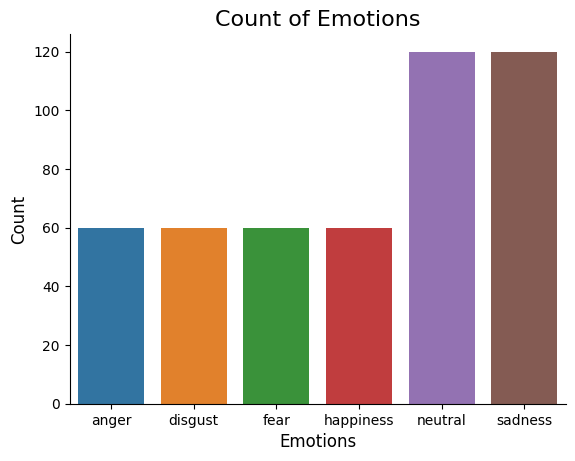

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data=df, x='Emotion_Label')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

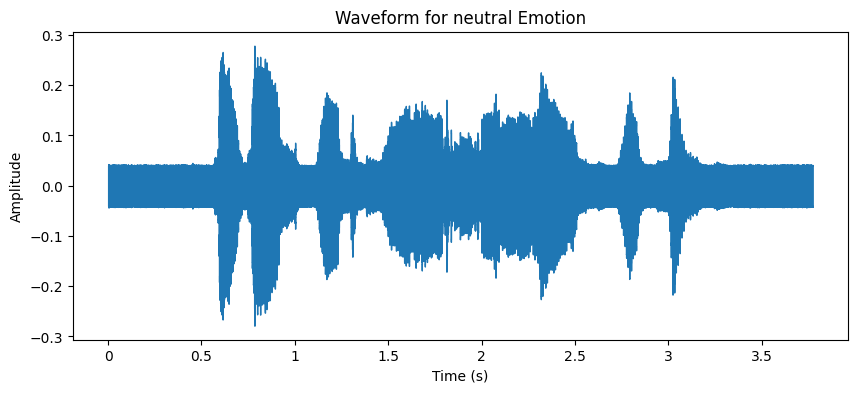

In [ ]:
emotion_label='neutral'
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f'Waveform for {emotion_name} Emotion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# to play the audio files
from IPython.display import Audio

In [ ]:
Audio(audio_path)

In [ ]:
# Define a function to plot the spectrogram
def plot_spectrogram(audio_path, emotion_name):
    # Load the audio file using librosa
    audio, sr = librosa.load(audio_path, sr=None)

    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

    # Convert to decibels
    db_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(db_spectrogram, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for {emotion_name} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


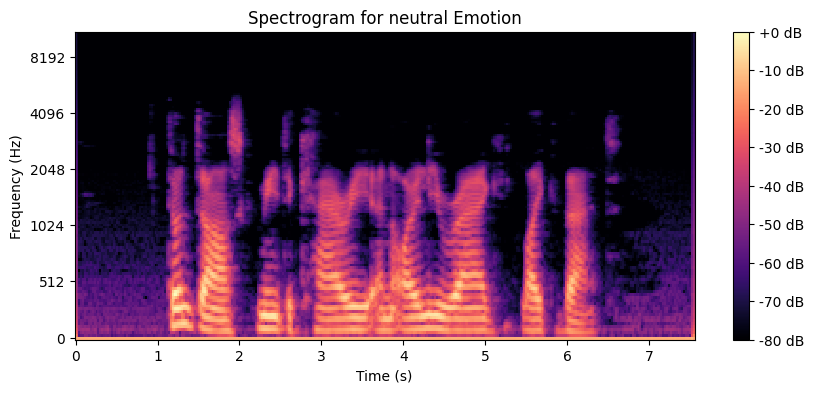

In [ ]:
emotion_label='neutral'
# Filter the DataFrame for the current emotion label
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the spectrogram for the audio file
plot_spectrogram(audio_path, emotion_name)

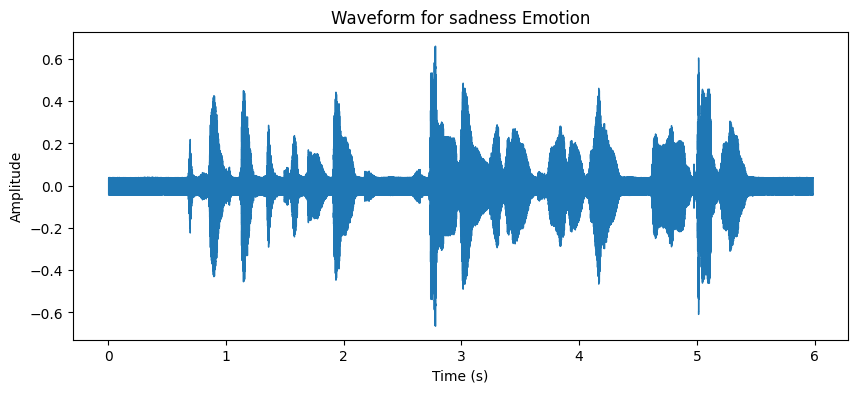

In [ ]:
emotion_label='sadness'
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f'Waveform for {emotion_name} Emotion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
Audio(audio_path)

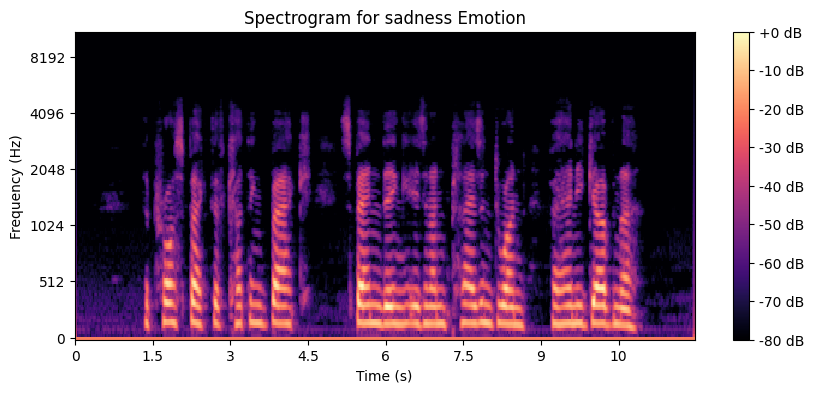

In [ ]:
emotion_label='sadness'
# Filter the DataFrame for the current emotion label
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the spectrogram for the audio file
plot_spectrogram(audio_path, emotion_name)

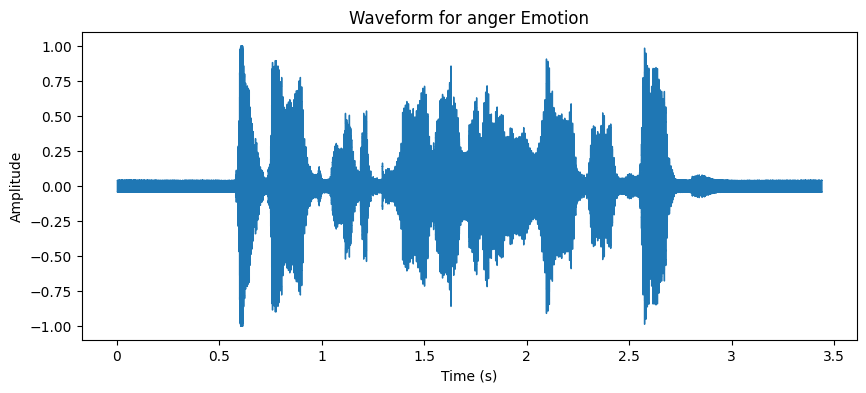

In [ ]:
emotion_label='anger'
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f'Waveform for {emotion_name} Emotion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(audio_path)

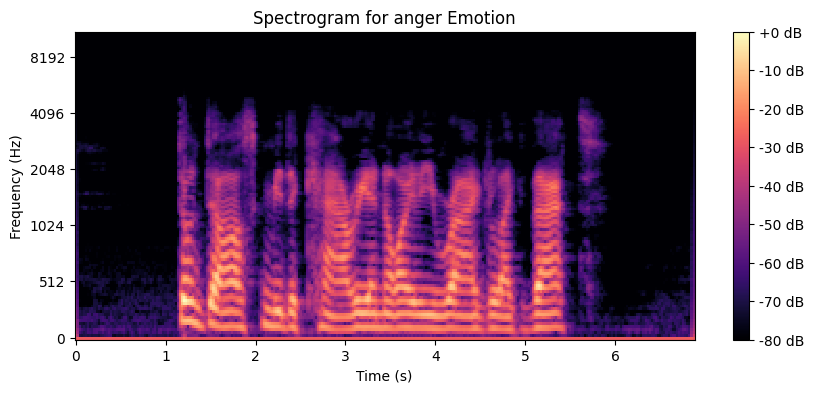

In [ ]:
emotion_label='anger'
# Filter the DataFrame for the current emotion label
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the spectrogram for the audio file
plot_spectrogram(audio_path, emotion_name)

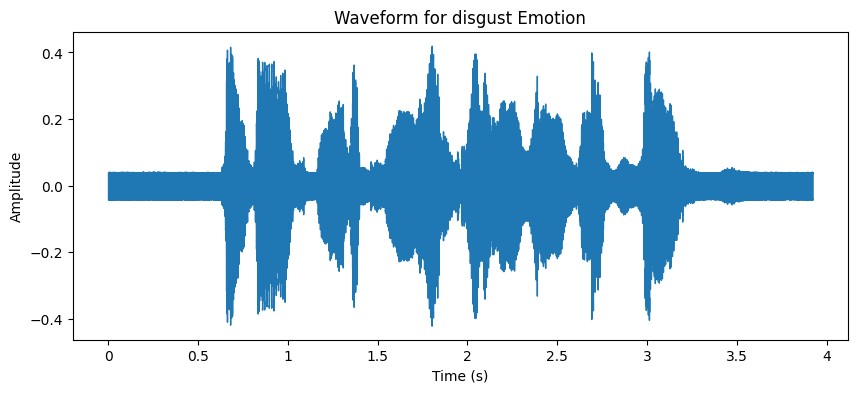

In [ ]:
emotion_label='disgust'
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f'Waveform for {emotion_name} Emotion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(audio_path)

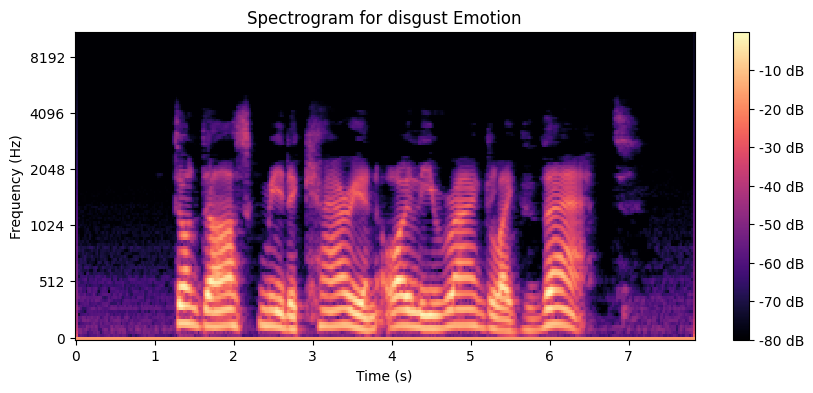

In [ ]:
emotion_label='disgust'
# Filter the DataFrame for the current emotion label
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the spectrogram for the audio file
plot_spectrogram(audio_path, emotion_name)

In [ ]:
emotion_label='fear'
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f'Waveform for {emotion_name} Emotion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(audio_path)

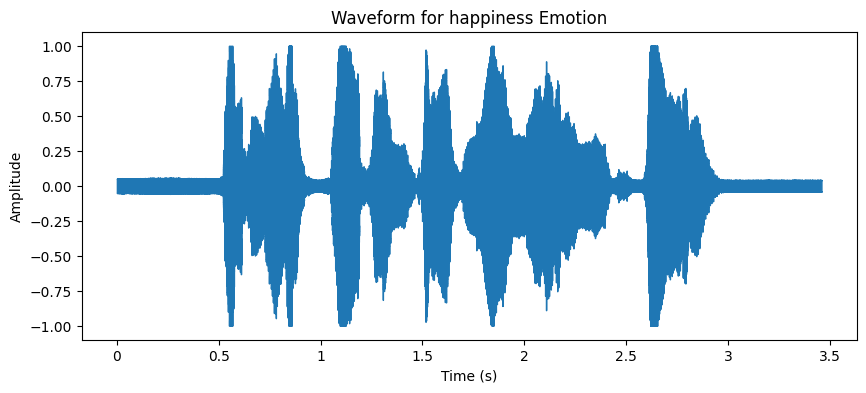

In [ ]:
emotion_label='happiness'
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f'Waveform for {emotion_name} Emotion')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(audio_path)

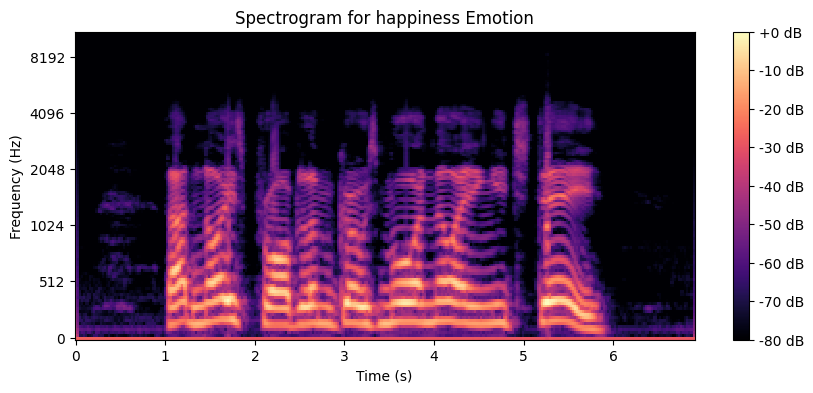

In [ ]:
emotion_label='happiness'
# Filter the DataFrame for the current emotion label
emotion_df = df[df['Emotion_Label'] == emotion_label]

# Select the first audio file for the current emotion label
audio_path = emotion_df.iloc[0]['Audio_Path']

# Get the emotion name from the mapping (if available)
emotion_name = emotion_label

# Plot the spectrogram for the audio file
plot_spectrogram(audio_path, emotion_name)

In [ ]:
# Define the desired length for your features (e.g., 3861 in your case)
desired_length = 3861

# Extract audio features from the 'Audio_Path' column and apply padding/truncation
def extract_features(audio_path):
    # Load the audio file using librosa
    audio, sr = librosa.load(audio_path, sr=None)

    # Extract relevant audio features (e.g., MFCCs, spectrograms)
    # You can add feature extraction code here

    # Apply padding or truncation to match the desired length
    if len(audio) < desired_length:
        # Pad with zeros
        audio = np.pad(audio, (0, desired_length - len(audio)))
    elif len(audio) > desired_length:
        # Truncate to the desired length
        audio = audio[:desired_length]

    return audio  # Replace with your extracted features

In [ ]:
# Apply the feature extraction function to each row in the DataFrame
df['Features'] = df['Audio_Path'].apply(extract_features)


In [ ]:

# Encode emotion labels
label_encoder = LabelEncoder()
df['Emotion_Label'] = label_encoder.fit_transform(df['Emotion_Label'])
# Split the data into training and testing sets
X = np.vstack(df['Features'].to_numpy())
y = df['Emotion_Label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train an SVM classifier
model_SVM = SVC(C=1.0, kernel='rbf', random_state=42)
model_SVM.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_SVM.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 34.38%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.39      0.55      0.45        31
           5       0.31      0.67      0.42        24

    accuracy                           0.34        96
   macro avg       0.12      0.20      0.15        96
weighted avg       0.20      0.34      0.25        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


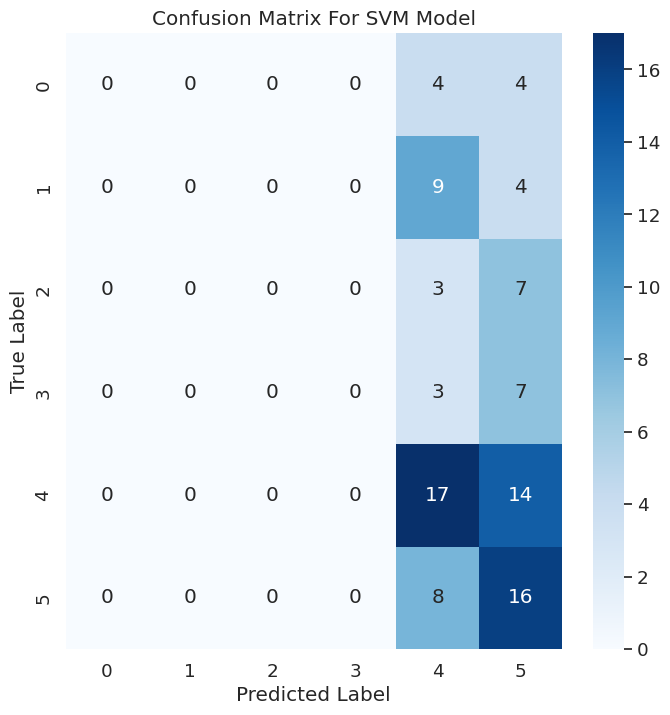

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Visualize Confusion Matrix For SVM model
result_cf = confusion_matrix (y_test,y_pred)
sns.set (font_scale=1.2)
plt.figure(figsize=(8,8))
label_name = np.unique(y_test)
sns.heatmap (result_cf,annot=True,cmap='Blues',fmt='g',xticklabels=label_name, yticklabels=label_name)
sns.set (font_scale=1.2)

plt.title ('Confusion Matrix For SVM Model')
plt.xlabel ('Predicted Label')
plt.ylabel ('True Label')
plt.show ()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# 5. Model evaluation
# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

Accuracy: 32.29%
              precision    recall  f1-score   support

           0       0.22      0.25      0.24         8
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        10
           3       0.40      0.20      0.27        10
           4       0.42      0.48      0.45        31
           5       0.28      0.50      0.36        24

    accuracy                           0.32        96
   macro avg       0.22      0.24      0.22        96
weighted avg       0.26      0.32      0.28        96



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Visualize Confusion Matrix For SVM model
result_cf = confusion_matrix (y_test,y_pred)
sns.set (font_scale=1.2)
plt.figure(figsize=(8,8))
label_name = np.unique(y_test)
sns.heatmap (result_cf,annot=True,cmap='Blues',fmt='g',xticklabels=label_name, yticklabels=label_name)
sns.set (font_scale=1.2)

plt.title ('Confusion Matrix For SVM Model')
plt.xlabel ('Predicted Label')
plt.ylabel ('True Label')
plt.show ()

In [ ]:
from sklearn.utils import resample

# Define the desired number of samples per class (e.g., 60)
desired_samples_per_class = 60

# Create an empty DataFrame to store the balanced data
balanced_df = pd.DataFrame(columns=df.columns)

# Iterate over unique emotion labels
for emotion_label in df['Emotion_Label'].unique():
    # Filter the DataFrame for the current emotion label
    emotion_df = df[df['Emotion_Label'] == emotion_label]

    # If the class has more samples than desired, randomly undersample it
    if len(emotion_df) > desired_samples_per_class:
        sampled_df = resample(emotion_df, replace=False, n_samples=desired_samples_per_class, random_state=42)
    else:
        # If the class has fewer samples than desired, use all available samples
        sampled_df = emotion_df

    # Append the sampled data to the balanced DataFrame
    balanced_df = balanced_df.append(sampled_df)

# Now, the balanced_df contains the balanced dataset

<ipython-input-36-badf919a5383>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_df)
<ipython-input-36-badf919a5383>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_df)
<ipython-input-36-badf919a5383>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_df)
<ipython-input-36-badf919a5383>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_df)
<ipython-input-36-badf919a5383>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [ ]:
balanced_df

Audio_Path Emotion_Label  \
0     /content/drive/MyDrive/Data/AudioData/DC/a02.wav             0   
1     /content/drive/MyDrive/Data/AudioData/DC/a03.wav             0   
2     /content/drive/MyDrive/Data/AudioData/DC/a04.wav             0   
3     /content/drive/MyDrive/Data/AudioData/DC/a01.wav             0   
4     /content/drive/MyDrive/Data/AudioData/DC/a05.wav             0   
..                                                 ...           ...   
473  /content/drive/MyDrive/Data/AudioData/KL/su09.wav             5   
97   /content/drive/MyDrive/Data/AudioData/DC/sa07.wav             5   
157  /content/drive/MyDrive/Data/AudioData/JE/sa14.wav             5   
342  /content/drive/MyDrive/Data/AudioData/JK/sa13.wav             5   
337  /content/drive/MyDrive/Data/AudioData/JK/sa08.wav             5   

                                              Features  
0    [0.039215088, 0.03930664, 0.03967285, 0.040161...  
1    [0.03994751, 0.039886475, 0.03982544, 0.039855...  
2    [0.039520264, 0.039520264, 0.0395813, 0.039642...  
3    [0.04800415, 0.04800415, 0.04800415, 0.0480041...  
4    [0.014160156, 0.014129639, 0.0140686035, 0.014...  
..                                                 ...  
473  [0.0013122559, 0.0013427734, 0.0013427734, 0.0...  
97   [0.040161133, 0.040039062, 0.03994751, 0.03982...  
157  [0.05038452, 0.050354004, 0.050231934, 0.05010...  
342  [0.051086426, 0.05114746, 0.051116943, 0.05108...  
337  [0.03994751, 0.039855957, 0.039794922, 0.03982...  

[360 rows x 3 columns]

In [ ]:
df

Audio_Path  Emotion_Label  \
0     /content/drive/MyDrive/Data/AudioData/DC/a02.wav              0   
1     /content/drive/MyDrive/Data/AudioData/DC/a03.wav              0   
2     /content/drive/MyDrive/Data/AudioData/DC/a04.wav              0   
3     /content/drive/MyDrive/Data/AudioData/DC/a01.wav              0   
4     /content/drive/MyDrive/Data/AudioData/DC/a05.wav              0   
..                                                 ...            ...   
475  /content/drive/MyDrive/Data/AudioData/KL/su11.wav              5   
476  /content/drive/MyDrive/Data/AudioData/KL/su12.wav              5   
477  /content/drive/MyDrive/Data/AudioData/KL/su13.wav              5   
478  /content/drive/MyDrive/Data/AudioData/KL/su14.wav              5   
479  /content/drive/MyDrive/Data/AudioData/KL/su15.wav              5   

                                              Features  
0    [0.039215088, 0.03930664, 0.03967285, 0.040161...  
1    [0.03994751, 0.039886475, 0.03982544, 0.039855...  
2    [0.039520264, 0.039520264, 0.0395813, 0.039642...  
3    [0.04800415, 0.04800415, 0.04800415, 0.0480041...  
4    [0.014160156, 0.014129639, 0.0140686035, 0.014...  
..                                                 ...  
475  [0.0053710938, 0.0053710938, 0.005340576, 0.00...  
476  [0.0039978027, 0.003967285, 0.003967285, 0.003...  
477  [0.0014648438, 0.0014648438, 0.0014953613, 0.0...  
478  [0.0014038086, 0.0014038086, 0.0014343262, 0.0...  
479  [0.0014038086, 0.0014343262, 0.0014343262, 0.0...  

[480 rows x 3 columns]

In [ ]:

# Encode emotion labels
label_encoder = LabelEncoder()
balanced_df['Emotion_Label'] = label_encoder.fit_transform(balanced_df['Emotion_Label'])

In [ ]:
X = np.vstack(balanced_df['Features'].to_numpy())
y = balanced_df['Emotion_Label'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train an SVM classifier
model_SVM = SVC(C=1.0, kernel='rbf', random_state=42)
model_SVM.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_SVM.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 18.06%
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        15
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.17      0.62      0.26         8
           5       0.17      0.14      0.15        14

    accuracy                           0.18        72
   macro avg       0.12      0.19      0.14        72
weighted avg       0.13      0.18      0.14        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)



In [ ]:
path = np.array(df['Audio_Path'])[1]

In [ ]:
# Load the audio file using librosa
data, sample_rate = librosa.load(path)


In [ ]:
# Ensure that the data is in the correct format and sample width (16-bit audio)
data = (data * 32768).astype(np.int16)

1. Simple Audio

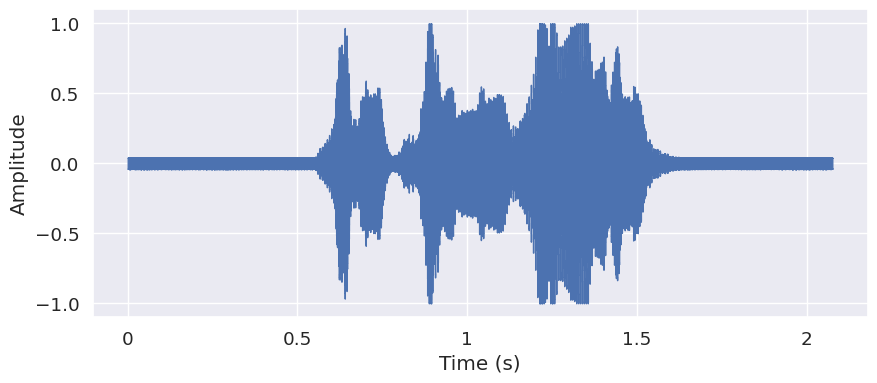

In [ ]:
# Select the first audio file for the current emotion label
audio_path = path

# Load the audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)


# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(audio_path)

2. Noise Injection

In [ ]:
# Apply noise to your audio data
augmented_data = noise(data)

# Display the waveform using librosa and matplotlib
plt.figure(figsize=(14, 4))
librosa.display.waveshow(augmented_data, sr=sample_rate)
plt.title('Noise Augmented Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Play the augmented audio
Audio(augmented_data, rate=sample_rate)

Shift

In [ ]:
# Apply time shifting to your audio data
shifted_data = shift(data)

# Plot the waveform of the shifted audio
plt.figure(figsize=(14, 4))
plt.title("Shifted Audio")
plt.plot(shifted_data)

# Play the shifted audio
Audio(shifted_data, rate=sample_rate)


Pitch

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# 5. Model evaluation
# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

Accuracy: 27.78%
              precision    recall  f1-score   support

           0       0.23      0.20      0.21        15
           1       0.40      0.27      0.32        15
           2       0.12      0.14      0.13         7
           3       0.38      0.23      0.29        13
           4       0.26      0.75      0.39         8
           5       0.30      0.21      0.25        14

    accuracy                           0.28        72
   macro avg       0.28      0.30      0.27        72
weighted avg       0.30      0.28      0.27        72



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Extract features and labels
X = np.array(balanced_df['Features'].tolist())
y = np.array(balanced_df['Emotion_Label'])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (288, 3861)
X_test shape: (72, 3861)
y_train shape: (288,)
y_test shape: (72,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
num_classes=6

# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input shape based on your feature vector dimension
    layers.Reshape((X_train.shape[1], 1)),   # Reshape for 1D convolution
    layers.Conv1D(64, 3, activation='relu'),  # 1D Convolutional layer
    layers.MaxPooling1D(2),                   # Max-pooling layer
    layers.Flatten(),                         # Flatten the output
    layers.Dense(128, activation='relu'),     # Dense layer
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 3861, 1)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3859, 64)          256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1929, 64)          0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 123456)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               15802496  
                                                                 
 dense_11 (Dense)            (None, 6)                 774       
                                                      